# Analise de dados da parte de Benefícios ao cidadão do auxilio emergencial 

Este projeto tem como objetivo analisar os dados do benefício auxilio emergencial.


Os dados foram tirados do Portal da Transparência do governo Federal específicamente da pagina : http://www.portaltransparencia.gov.br/download-de-dados/auxilio-emergencial  

E o dicionário de dados foi tirado desta pagina: http://www.portaldatransparencia.gov.br/pagina-interna/603515-dicionario-de-dados-auxilio-emergencial 

### Dicionário de dados 

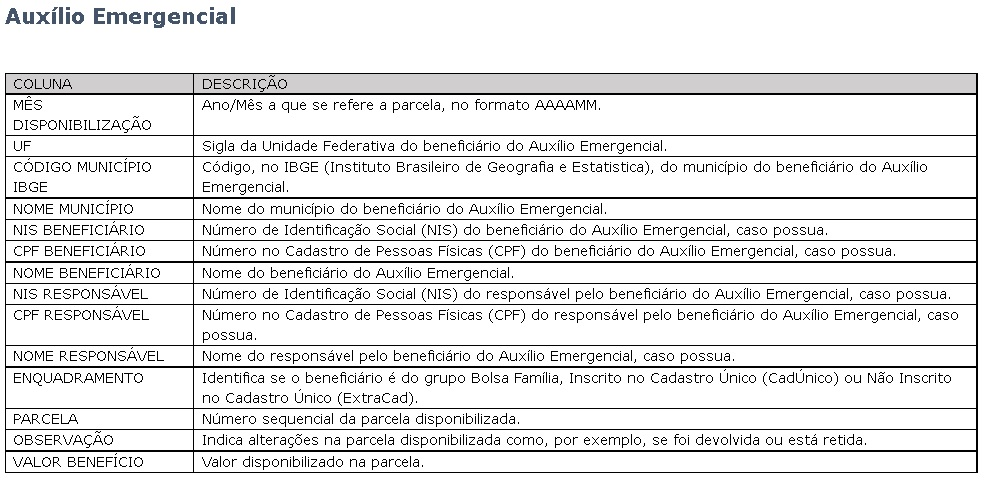

In [1]:
from IPython.display import Image
Image(filename='dicionario_dados.jpg') 

In [2]:
# Pacotes utilizados para carregar, salvar, analisar e apresentar gráficos dos dados baixados
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

### Contabilizando quantos meses existem na base de dados do auxilio emergencial baixados 

In [3]:
pasta = 'base_dados'
lista_arquivos = os.listdir(pasta)
n = 0
for arq in lista_arquivos:
    n+=1
    print(arq)
print(120*'--')    
print('Existem {} arquivos csv, portanto {} meses'.format(n,n))

202004_AuxilioEmergencial.csv
202005_AuxilioEmergencial.csv
202006_AuxilioEmergencial.csv
202007_AuxilioEmergencial.csv
202008_AuxilioEmergencial.csv
202010_AuxilioEmergencial.csv
202011_AuxilioEmergencial.csv
202012_AuxilioEmergencial.csv
202101_AuxilioEmergencial.csv
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Existem 9 arquivos csv, portanto 9 meses


#### Devido os dados terem tamanho muito grande vamos utilizar uma de 0.2% dos dados

####  Vamos analizar um único mês para podermos automatizar o tratamento de dados e colunas, já que todos terão o mesmo formato e os mesmos nomes de colunas

In [4]:
# Lendo uma amostra de 0.2% dos dados, pois a base de dados tem mais de 8Gb de tamanho e ;
# Utilizar o ';' como separate para separar as colunas;
# Utilizar o enconding ISO-8859-1 que é o indicado para dados do governo brasileiro;
# adicionar o skiprows para coletar uma linha a cada 500 linhas, para assim diminuir a amostra de dados


df_202004 = pd.read_csv('base_dados/202004_AuxilioEmergencial.csv', 
                 sep=';',
                 encoding = "ISO-8859-1",                      
                 skiprows = lambda i: i% 500)
df_202004.head()

,MÊS DISPONIBILIZAÇÃO,UF,CÓDIGO MUNICÍPIO IBGE,NOME MUNICÍPIO,NIS BENEFICIÁRIO,CPF BENEFICIÁRIO,NOME BENEFICIÁRIO,NIS RESPONSÁVEL,CPF RESPONSÁVEL,NOME RESPONSÁVEL,ENQUADRAMENTO,PARCELA,OBSERVAÇÃO,VALOR BENEFÍCIO
0,202004,NaN,NaN,NaN,0,***.230.780-**,CLAURI GOMES VELHO,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"600,00"
1,202004,NaN,NaN,NaN,0,***.786.503-**,GABRIELA MOREIRA,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"600,00"
2,202004,NaN,NaN,NaN,0,***.583.217-**,KEDMA CAETANO REZENDE,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"1200,00"
3,202004,NaN,NaN,NaN,0,***.122.618-**,MICHELANGELO ROMANO,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Não há,"600,00"
4,202004,NaN,NaN,NaN,0,***.093.950-**,SONIA MARIA PEREIRA DA SILVA,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"600,00"


In [5]:
# Salvando dados no ambiente local
df_202004.to_csv('df_202004')

In [6]:
# Carregando dados salvos e visualizando as 5 linhas primeiras
df_202004 = pd.read_csv('df_202004', index_col=0)
df_202004.head()

,MÊS DISPONIBILIZAÇÃO,UF,CÓDIGO MUNICÍPIO IBGE,NOME MUNICÍPIO,NIS BENEFICIÁRIO,CPF BENEFICIÁRIO,NOME BENEFICIÁRIO,NIS RESPONSÁVEL,CPF RESPONSÁVEL,NOME RESPONSÁVEL,ENQUADRAMENTO,PARCELA,OBSERVAÇÃO,VALOR BENEFÍCIO
0,202004,NaN,NaN,NaN,0,***.230.780-**,CLAURI GOMES VELHO,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"600,00"
1,202004,NaN,NaN,NaN,0,***.786.503-**,GABRIELA MOREIRA,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"600,00"
2,202004,NaN,NaN,NaN,0,***.583.217-**,KEDMA CAETANO REZENDE,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"1200,00"
3,202004,NaN,NaN,NaN,0,***.122.618-**,MICHELANGELO ROMANO,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Não há,"600,00"
4,202004,NaN,NaN,NaN,0,***.093.950-**,SONIA MARIA PEREIRA DA SILVA,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"600,00"


In [7]:
# definindo função para calcular a porcentagem de valores nulos de cada variável
def percent_Nan(df):
    return (df.isnull().sum()/df.shape[0]*100).map("{:.2f}%".format)

In [8]:
# Porcentagem de valores Nan de cada Coluna 
percent_Nan(df_202004)

MÊS DISPONIBILIZAÇÃO      0.00%
UF                        0.01%
CÓDIGO MUNICÍPIO IBGE     0.01%
NOME MUNICÍPIO            0.01%
NIS BENEFICIÁRIO          0.00%
CPF BENEFICIÁRIO          0.00%
NOME BENEFICIÁRIO         0.00%
NIS RESPONSÁVEL           0.00%
CPF RESPONSÁVEL          60.77%
NOME RESPONSÁVEL          0.00%
ENQUADRAMENTO             0.00%
PARCELA                   0.00%
OBSERVAÇÃO               39.23%
VALOR BENEFÍCIO           0.00%
dtype: object

### Tratando os valores Nan em cada coluna 

#### Coluna OBSERVAÇÃO

In [9]:
# Verificando quantidade de valores Nan da coluna Observação
df_202004['OBSERVAÇÃO'].value_counts(dropna=False)

Não há                              54755
NaN                                 38488
Pagamento bloqueado ou cancelado     4655
Valor devolvido à União.              215
Name: OBSERVAÇÃO, dtype: int64

In [10]:
# Supondo que o valor Nan seja equivalente ao valor 'Não há', vamos substituir o valor Nan e o valor 'Não há' por 'recebe'.
df_202004.fillna(value={'OBSERVAÇÃO':'Não há'}, inplace=True)
df_202004['OBSERVAÇÃO'].replace('Não há','recebe', inplace=True)

In [11]:
# Verificando quantidade de cada valore único após substituição
df_202004['OBSERVAÇÃO'].value_counts(dropna=False)

recebe                              93243
Pagamento bloqueado ou cancelado     4655
Valor devolvido à União.              215
Name: OBSERVAÇÃO, dtype: int64

#### CPF RESPONSÁVEL e BENEFICIÁRIO

In [12]:
# Verificando quantidade de valores Nan 
df_202004['CPF RESPONSÁVEL'].value_counts(dropna=False)

NaN               59625
***.000.000-**      142
***.540.898-**        4
***.409.305-**        3
***.865.543-**        3
                  ...  
***.453.564-**        1
***.425.927-**        1
***.022.454-**        1
***.895.825-**        1
***.279.154-**        1
Name: CPF RESPONSÁVEL, Length: 37372, dtype: int64

In [43]:
# Supondo que o valor Nan seja equivalente ao valor ***.000.000-**, por isso vamos substituir os dois por 'vazio'
df_202004.fillna(value={'CPF RESPONSÁVEL':'vazio'}, inplace=True)
df_202004['CPF RESPONSÁVEL'].replace(to_replace='***.000.000-**', value='vazio', inplace=True)

In [33]:
# Verificando quantidade de cada valore único após substituição
df_202004['CPF RESPONSÁVEL'].value_counts(dropna=False)

vazio             59767
***.540.898-**        4
***.201.992-**        3
***.948.503-**        3
***.167.036-**        3
                  ...  
***.384.246-**        1
***.924.662-**        1
***.183.163-**        1
***.280.195-**        1
***.516.674-**        1
Name: CPF RESPONSÁVEL, Length: 37371, dtype: int64

In [44]:
# Supondo que o valor Nan seja equivalente ao valor ***.000.000-**, por isso vamos substituir os dois por 'vazio'
df_202004['CPF BENEFICIÁRIO'].replace(to_replace='***.000.000-**', value='vazio', inplace=True)

In [45]:
# Verificando quantidade de cada valore único após substituição
df_202004['CPF BENEFICIÁRIO'].value_counts(dropna=False)

vazio             916
***.963.274-**      4
***.668.998-**      4
***.755.236-**      4
***.953.318-**      4
                 ... 
***.341.555-**      1
***.938.888-**      1
***.512.668-**      1
***.174.321-**      1
***.318.101-**      1
Name: CPF BENEFICIÁRIO, Length: 92106, dtype: int64

#### NOME MUNICÍPIO e UF 

In [15]:
# Verificando que há poucos valores Nan 
df_202004['NOME MUNICÍPIO'].isnull().sum()

5

In [16]:
# devido a quantidade de valores Nan ser pequena vamos substituir pela moda 
df_202004['NOME MUNICÍPIO'].fillna(df_202004['NOME MUNICÍPIO'].mode()[0], inplace=True)

In [17]:
# A mesma coisa serve para UF e CÓDIGO MUNICÍPIO IBGE , ou seja subistitui por SP'
df_202004['UF'].fillna(df_202004['UF'].mode()[0], inplace=True)
df_202004['CÓDIGO MUNICÍPIO IBGE'].fillna(df_202004['CÓDIGO MUNICÍPIO IBGE'].mode()[0], inplace=True)

In [18]:
# 39,56% dos valores da variável NIS BENEFICIÁRIO são zeros
df_202004['NIS BENEFICIÁRIO'].value_counts(normalize=True)*100

0              39.561526
20047410099     0.001019
12737329649     0.001019
23693720351     0.001019
16586478503     0.001019
                 ...    
20382074321     0.001019
12101678324     0.001019
16568034542     0.001019
13143258348     0.001019
16161920949     0.001019
Name: NIS BENEFICIÁRIO, Length: 59299, dtype: float64

In [19]:
# Substituir os valores 0 pelo padrão vazio
df_202004['NIS BENEFICIÁRIO'].replace(0,'vazio', inplace=True) 

In [20]:
# Não temos mais valores Nan
percent_Nan(df_202004)

MÊS DISPONIBILIZAÇÃO     0.00%
UF                       0.00%
CÓDIGO MUNICÍPIO IBGE    0.00%
NOME MUNICÍPIO           0.00%
NIS BENEFICIÁRIO         0.00%
CPF BENEFICIÁRIO         0.00%
NOME BENEFICIÁRIO        0.00%
NIS RESPONSÁVEL          0.00%
CPF RESPONSÁVEL          0.00%
NOME RESPONSÁVEL         0.00%
ENQUADRAMENTO            0.00%
PARCELA                  0.00%
OBSERVAÇÃO               0.00%
VALOR BENEFÍCIO          0.00%
dtype: object

In [22]:
# Salvando dados tratados sem Nan no ambiente local
df_202004.to_csv('df_trata_Nan_202004')

#### Função para automatizar tratamento de valores Nan

In [21]:
def trata_Nan(df):
    nome = df['MÊS DISPONIBILIZAÇÃO'][0]
    df.fillna(value={'OBSERVAÇÃO':'Não há'}, inplace=True)
    df.replace('Não há','recebe', inplace=True)
    df.fillna(value={'CPF RESPONSÁVEL':'-'}, inplace=True)
    df['CPF RESPONSÁVEL'].replace(to_replace='***.000.000-**', value='vazio', inplace=True)
    df_202004['NIS BENEFICIÁRIO'].replace(0,'vazio', inplace=True) 
    df['NOME MUNICÍPIO'].fillna(df['NOME MUNICÍPIO'].mode()[0], inplace=True)
    df['UF'].fillna(df['UF'].mode()[0], inplace=True)
    df['CÓDIGO MUNICÍPIO IBGE'].fillna(df['CÓDIGO MUNICÍPIO IBGE'].mode()[0], inplace=True)
    return df.to_csv('df_trata_Nan_{}'.format(nome))

### Análises 

In [23]:
# Função para retornar o valor único de uma variável groupby para outra  
def groupby_filter_percent(df, groupby, val_unico, var):
    
    df_plot = df.groupby([groupby])[var]\
                 .value_counts(normalize=True)\
                 .filter(like=val_unico)\
                 .to_frame('Count')\
                 .reset_index()\
    
    return df_plot.style.format({'Count': '{:.2%}'}).bar(subset='Count', color='lightblue').hide_index()

In [24]:
# Função para retornar um gráfico da função groupby_filter_percent
def groupby_filter_plt_bar(df, groupby, val_unico, var):
    
    groupby_filter_percent(df, groupby, val_unico, var)
                        
    plt.figure(figsize=(14,8))
 
    plt.bar(df_plot.iloc[:,0] ,df_plot.iloc[:,1] )
    plt.title('Gráfigo de do valor único \"{}\" da variável {} em relação à {}'.format(val_unico,groupby,var), size=22)
    plt.show
    
    return 

## Amostra do mês de abril de 2020 

## Analise

### Campos vazios do CPF RESPONSÁVEL

#### No quesito OBSERVAÇÃO  

##### 91.85%  Receberam o auxilio
##### 7.79%    Tiveram o Pagamento bloqueado ou cancelado
##### 0.36%    Tiveram o Valor devolvido à União

In [34]:
groupby_filter_percent(df_202004, 'CPF RESPONSÁVEL', 'vazio', 'OBSERVAÇÃO')

CPF RESPONSÁVEL,OBSERVAÇÃO,Count
vazio,recebe,91.85%
vazio,Pagamento bloqueado ou cancelado,7.79%
vazio,Valor devolvido à União.,0.36%


#### No quesito ENQUADRAMENTO

##### 64.94% Se enquadraram no EXTRA CADUN  
##### 34.82% Se enquadraram no CADUN NAO BOLSA
##### 0.24% Se enquadraram no BOLSA FAMILIA

In [35]:
groupby_filter_percent(df_202004, 'CPF RESPONSÁVEL', 'vazio', 'ENQUADRAMENTO')

CPF RESPONSÁVEL,ENQUADRAMENTO,Count
vazio,EXTRA CADUN,64.94%
vazio,CADUN NAO BOLSA,34.82%
vazio,BOLSA FAMILIA,0.24%


#### No quesito UF (ESTADO)
##### 20.87% estão no estado da sigra SP
##### 10.22% estão no estado da sigra MG
##### 8.75% estão no estado da sigra RJ
##### 7.38% estão no estado da sigra BA
##### 5.48% estão no estado da sigra PR
##### 4.74% estão no estado da sigra PE
##### 4.50% estão no estado da sigra RS

In [36]:
groupby_filter_percent(df_202004, 'CPF RESPONSÁVEL', 'vazio', 'UF')

CPF RESPONSÁVEL,UF,Count
vazio,SP,20.87%
vazio,MG,10.22%
vazio,RJ,8.75%
vazio,BA,7.38%
vazio,PR,5.48%
vazio,PE,4.74%
vazio,RS,4.50%
vazio,CE,4.46%
vazio,PA,4.40%
vazio,GO,3.84%


### Campos vazios do CPF BENEFICIÁRIO

#### No quesito OBSERVAÇÃO
##### 100%  Receberam o auxilio

In [46]:
# Nessa amostra do mês de abril de 2020 todas CPF BENEFICÍARIO com o campo vazio receberam o auxilio
groupby_filter_percent(df_202004, 'CPF BENEFICIÁRIO', 'vazio', 'OBSERVAÇÃO')

CPF BENEFICIÁRIO,OBSERVAÇÃO,Count
vazio,recebe,100.00%


#### No quesito ENQUADRAMENTO
##### 100% Se enquadraram no BOLSA FAMILIA

In [47]:
# Nessa amostra do mês de abril de 2020 todas CPF BENEFICÍARIO com o campo vazio se enquadravam no BOLSA FAMILIA  
groupby_filter_percent(df_202004, 'CPF BENEFICIÁRIO', 'vazio', 'ENQUADRAMENTO')

CPF BENEFICIÁRIO,ENQUADRAMENTO,Count
vazio,BOLSA FAMILIA,100.00%


#### No quesito UF (ESTADO)
##### 14.41% estão no estado da sigra BA
##### 12.45% estão no estado da sigra MA
##### 9.50% estão no estado da sigra PA
##### 9.28% estão no estado da sigra PE
##### 5.90% estão no estado da sigra MG
##### 5.46% estão no estado da sigra AM
##### 5.24% estão no estado da sigra SP

In [48]:
groupby_filter_percent(df_202004, 'CPF BENEFICIÁRIO', 'vazio', 'UF')

CPF BENEFICIÁRIO,UF,Count
vazio,BA,14.41%
vazio,MA,12.45%
vazio,PA,9.50%
vazio,PE,9.28%
vazio,CE,7.10%
vazio,MG,5.90%
vazio,AM,5.46%
vazio,SP,5.24%
vazio,PB,3.82%
vazio,PI,3.82%


### Campos da OBSERVAÇÃO
#### recebe  : Indica que recebeu o auxilio emergêncial
#### Pagamento bloqueado ou cancelado : Indica que o auxilio emergêncial foi bloqueado ou cancelado	
#### Valor devolvido à União: Indica que o auxilio emergêncial foi devolvido à União

#### Porcentagem de todos que receberam o auxílio emergêncial dos 5 estados com maior porcentagem
##### 16.52% que receberam o auxílio emergêncial está em SP
##### 9.92% que receberam o auxílio emergêncial está em BA
##### 8.96% que receberam o auxílio emergêncial está em MG
##### 7.73% que receberam o auxílio emergêncial está em RJ
##### 6.18% que receberam o auxílio emergêncial está em PE

In [68]:
groupby_filter_percent(df_202004,'OBSERVAÇÃO', 'recebe', 'UF')

OBSERVAÇÃO,UF,Count
recebe,SP,16.52%
recebe,BA,9.92%
recebe,MG,8.96%
recebe,RJ,7.73%
recebe,PE,6.18%
recebe,CE,6.03%
recebe,PA,5.50%
recebe,MA,4.66%
recebe,PR,4.26%
recebe,RS,3.65%


#### Porcentagem de todo auxílio emergêncial que foi bloqueado ou cancelado, dos 5 estados com maior porcentagem
##### 18.99%  bloqueado ou cancelado está em SP
##### 11.60%  bloqueado ou cancelado está em MG
##### 7.60%  bloqueado ou cancelado está em RJ
##### 7.02%  bloqueado ou cancelado está em BA
##### 6.02%  bloqueado ou cancelado está em PR

In [69]:
groupby_filter_percent(df_202004,'OBSERVAÇÃO', 'Pagamento bloqueado ou cancelado', 'UF')

OBSERVAÇÃO,UF,Count
Pagamento bloqueado ou cancelado,SP,18.99%
Pagamento bloqueado ou cancelado,MG,11.60%
Pagamento bloqueado ou cancelado,RJ,7.60%
Pagamento bloqueado ou cancelado,BA,7.02%
Pagamento bloqueado ou cancelado,PR,6.02%
Pagamento bloqueado ou cancelado,PA,5.11%
Pagamento bloqueado ou cancelado,GO,4.77%
Pagamento bloqueado ou cancelado,MA,4.36%
Pagamento bloqueado ou cancelado,CE,4.34%
Pagamento bloqueado ou cancelado,PE,3.78%


#### Porcentagem de todo auxílio emergêncial que foi valor devolvido à União, dos 5 estados com maior porcentagem
##### 14.88%  valor devolvido à União está em SP
##### 13.02%  valor devolvido à União está em RJ
##### 8.37%  valor devolvido à União está em PR
##### 7.91%  valor devolvido à União está em RS
##### 6.51%  valor devolvido à União está em MG

In [72]:
groupby_filter_percent(df_202004,'OBSERVAÇÃO', 'Valor devolvido à União', 'UF')

OBSERVAÇÃO,UF,Count
Valor devolvido à União.,SP,14.88%
Valor devolvido à União.,RJ,13.02%
Valor devolvido à União.,PR,8.37%
Valor devolvido à União.,RS,7.91%
Valor devolvido à União.,MG,6.51%
Valor devolvido à União.,PB,4.65%
Valor devolvido à União.,PE,4.65%
Valor devolvido à União.,CE,4.19%
Valor devolvido à União.,MS,4.19%
Valor devolvido à União.,BA,3.72%


In [105]:
# Analisando Váriáveis repetiddas 
df_202004.groupby([
    
#                     'UF',
#                     'NOME MUNICÍPIO'
#                    'NOME BENEFICIÁRIO',
#                    'NIS RESPONSÁVEL',
                    'NIS BENEFICIÁRIO', 
#                       'ENQUADRAMENTO',
#                       'OBSERVAÇÃO',
#                     'VALOR BENEFÍCIO'  
#                     'CPF RESPONSÁVEL',
#                       'CPF BENEFICIÁRIO'
                        
                                        ], dropna=False)['ENQUADRAMENTO']\
            .size()\
            .reset_index(name='count CPF')\
            .sort_values(by='count CPF',
                         ascending=False)\
#             .filter(like='Valor devolvido à União')
#             .reset_index()
            

,NIS BENEFICIÁRIO,count CPF
59298,vazio,38815
39523,20021671286,1
39525,20021826085,1
39526,20021887688,1
39527,20021897829,1
...,...,...
19770,16119563998,1
19771,16119583263,1
19772,16119597698,1
19773,16119607898,1


In [ ]:
df_202004.groupby(['ENQUADRAMENTO'])['OBSERVAÇÃO'].value_counts().to_frame('count').reset_index()

### Recomeçar a partir daqui

In [ ]:
# Automatizando tudo que foi feito até agora na função trata_dados

def trata_dados(df, arquivo_csv):
      
    # Substituindo valores Nan da coluna OBSERVAÇÃO por 'Não há'
    df.fillna(value={'OBSERVAÇÃO':'Não há'}, inplace=True)
    
    # Deletando as linhas que sobraram de valores Nan
    df.dropna(axis=0, inplace=True)
    
    # Substituindo espaço por _ nos nomes das colunas
    df.columns = df.columns.str.replace(' ', '_')
    
    # Colocando a coluna 'MÊS_DISPONIBILIZAÇÃO' como index
    df.columns = df.set_index('MÊS_DISPONIBILIZAÇÃO')
   
    
    # Salvando o dataset com a referência de data no nome em formato csv
    
    
    df.to_csv('base_dados_amostra/amostra_{}'.format(arquivo_csv))
    
    return print('o arquivo amostra_{} foi tratado e salvo na pasta base_dados_amostra'.format(arquivo_csv))

In [ ]:
# Vamos usar a lista_arquivos que foi criada no começo do notebook
# e a função trata_dados 
for dado in lista_arquivos:
    df = pd.read_csv('base_dados/{}'.format(dado), sep=';',
                     encoding = "ISO-8859-1",
                     usecols=[0,1,3,10,11,12,13],
                     skiprows = lambda i: i% 300)
    trata_dados(df,dado)    

In [ ]:
# Agora vamos passar os arquivos CSV para dataframe
pasta = 'base_dados_amostra'
lista_amostra = os.listdir(pasta)
lista_df =[]
for csv in lista_amostra[1:]:   
    df = pd.read_csv('base_dados_amostra/{}'.format(csv), index_col=0)
    lista_df.append(df)

In [ ]:
df_total = pd.concat(lista_df, ignore_index=True, sort=False, )
df_total

In [ ]:
df_total.to_csv('base_dados_amostra/data_totals.csv')

In [ ]:
df_t= pd.read_csv('base_dados_amostra/data_totals.csv', index_col=0)
df_t

In [ ]:
df_t.OBSERVAÇÃO.value_counts(normalize=True).plot.pie()

In [ ]:
df_total

In [ ]:
df_total.set_index('MÊS_DISPONIBILIZAÇÃO', inplace=True)

In [ ]:
df_total.isnull().sum()